In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w,b,num_examples): #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

In [4]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([ 0.0863, -0.0923]) 
label: tensor([4.6755])


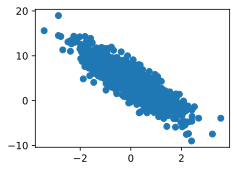

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy())

In [6]:
def data_iter(bath_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的,没有特定的顺序
    random.shuffle(indices)
    for i in range(0,num_examples,bath_size):
        bath_indices = torch.tensor(indices[i:min(i+bath_size,num_examples)])
        yield features[bath_indices],labels[bath_indices]

In [7]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-0.4550,  1.1875],
        [ 1.1923, -1.7305],
        [ 1.6587, -0.5941],
        [ 0.7655,  1.1371],
        [-1.1596,  1.9796],
        [-1.1712,  0.2264],
        [-0.1241, -0.2082],
        [ 0.0607,  0.5712],
        [-0.2181, -0.7996],
        [ 0.7369,  2.2408]]) 
 tensor([[-0.7626],
        [12.4593],
        [ 9.5364],
        [ 1.8520],
        [-4.8694],
        [ 1.0746],
        [ 4.6596],
        [ 2.3743],
        [ 6.4872],
        [-1.9596]])


In [8]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [9]:
def linreg(X,w,b): #@save
    """线性回归模型"""
    return torch.matmul(X,w) + b

In [10]:
def squared_loss(y_hat,y): #@save
    """均方误差"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
def sgd(params,lr,batch_size): #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y) # X和y的小批量损失
        # 因为l形状是(batch_size,1),而不是一个标量。l中的所有元素被加到一起
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1},loss {float(train_l.mean()):f}')

epoch 1,loss 0.038717
epoch 2,loss 0.000145
epoch 3,loss 0.000050


In [13]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 9.4056e-05, -2.2197e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0003], grad_fn=<RsubBackward1>)
